In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('bmh')
%matplotlib inline

from sklearn.preprocessing import StandardScaler
pd.options.display.max_rows = 14
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sklearn.model_selection as ms

from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [91]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X1 = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X1).reshape(x0.shape)
    y_decision = clf.decision_function(X1).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred,cmap=plt.cm.brg, alpha=0.1)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.3)

In [92]:
def plot(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X1 = np.c_[x0.ravel(), x1.ravel()]
    y_decision = clf._decision_function(X1).reshape(x0.shape)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.5)

In [93]:
def out_det(fn, clf, axes):
    plt.figure(figsize=(10,10))
    fn(clf, axes)
    plt.scatter(X_train[:,4], X_train[:,5], c= out)
    plt.xlabel('fea - 4')
    plt.ylabel('fea - 5')

In [150]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size = 0.2, random_state=42)
scale =  StandardScaler()
scale.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

# OneClassSVM

In [96]:
from sklearn.svm import OneClassSVM

one_svm = OneClassSVM(nu=0.1,  gamma=0.1)
one_svm.fit(X_train[:,[4,5]])
out = one_svm.predict(X_train[:,[4,5]])

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

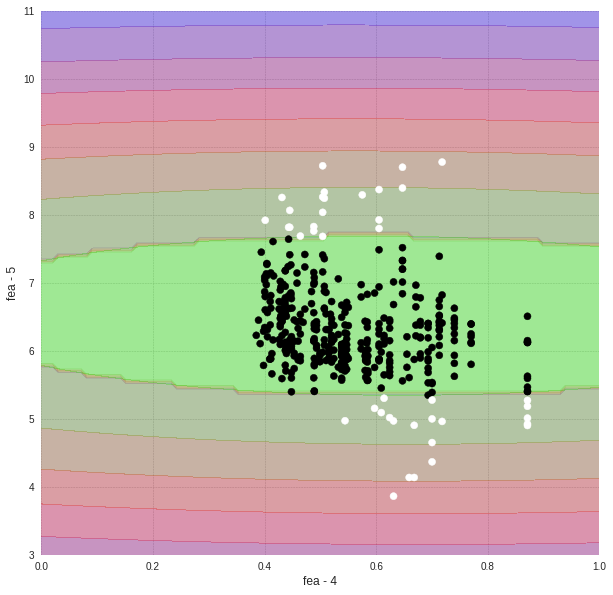

In [97]:
out_det(plot_predictions, one_svm, [0, 1, 3, 11])

# Elliptical Envelope

In [98]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope()
ee.fit(X_train[:, [4,5]])
out = ee.predict(X_train[:, [4,5]])

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

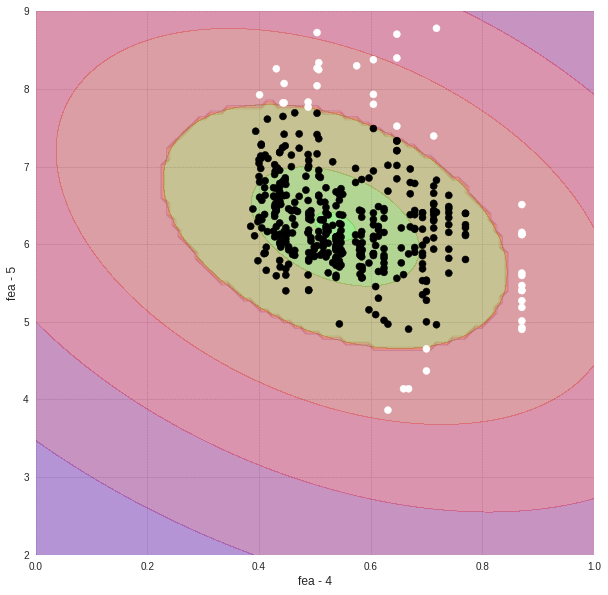

In [99]:
out_det(plot_predictions, ee, [0, 1, 2, 9])

# IsolationForest

In [100]:
from sklearn.ensemble import IsolationForest
iso_frt = IsolationForest(max_samples=100, random_state=42)
iso_frt.fit(X_train[:,[4,5]])
out = iso_frt.predict(X_train[:,[4,5]])

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples=100, n_estimators=100, n_jobs=1, random_state=42,
        verbose=0)

In [101]:
out_det(plot_predictions, iso_frt, [0, 1, 3, 11])

# LocalOutlierFactor

In [104]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20)
out = lof.fit_predict(X_train[:,[4,5]])

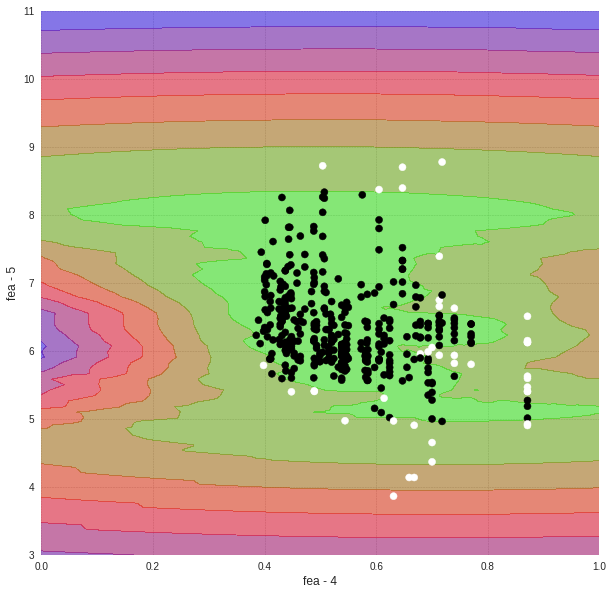

In [105]:
out_det(plot, lof, [0, 1, 3, 11])

# PROBPLOT

In [107]:
from scipy import stats
import seaborn as sns

# Left Skewed

In [135]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
x= stats.probplot(boston.data[:, 0], plot = plt)
plt.subplot(1, 2, 2)
pd.Series(boston.data[:, 0]).hist()

# Right Skewed

In [136]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
x= stats.probplot(boston.data[:, 6], plot = plt)
plt.subplot(1, 2, 2)
pd.Series(boston.data[:, 6]).hist()

# For all columns in boston

In [149]:
x = plt.figure(figsize=(25,45))
for i in range(13):
    x = plt.subplot(7, 2, i+1)
    x= stats.probplot(boston.data[:, i], plot = plt)